# Chapter 5: Kinetic modelling of a bioreactor


<img src="blackbox.jpg" width="470" />

Okey class, we are now shifting gears by getting inside of the black box models (mass balances) that we have considered before. We are now interested in understanding the rate or dynamic behaviour of what is happening within the processes that we consider. Upto now we have looked at how edible biomass is produced. We have seen from the work in chapters 1-4 that numerous waste streams got generated from the food chain, like non-edible biomass, livestock waste, manure and urine. We now fully understand that biomass contains energy and given the world's current energy crisis, we need to consider the potential for harvesting the energy from the unused biomass. This is where the [anaerobic digester](https://en.wikipedia.org/wiki/Anaerobic_digestion) plays a very important role. Numerous of the waste products from the food chain tends to end up in water and we also need some understanding on the biological treatment of these wastewaters.

But before we go into more details, we must understand the basic governing formulas of the bioreactor. You might wonder what a bioreactor is? You have already encountered the bioreactor of the human body, a chicken and an agricultaral growth facility. A bioreactor can be seen as defined space where organisms grow or where organisms maintain themself. To do this energy is required, either in the form of sunlight if the organisms are autotrophic or in the form of chemical energy if the organisms are heterotrophic. So let's have a look at the basic governing equations of the bioreactor. 

### Basic equations of the bioreactor

In CBI310 we’ll assume that all fermenters are well mixed and that no concentration or temperature gradients exist within the fermentation broth. In real life the assumption is often approximated where gradients are minimal. The easiest way to perform the mass balance over the fermenter is to consider the cmol balance of each component. To simplify only the liquid phase will be considered, we'll get to the other phases later.  We’ll start with a time-dependant model were the dynamic concentration and volume changes in the fermenter are incorporated by an accumulation term for each component ($\frac{dN_i}{dt}$). Note that the cmol quantity ($N_i$) is the product of the cmol concentration ($C_i$ in $\frac{cmol}{L}$) and the fermenter volume ($V$). The concentration of a component and/or volume will change with addition/removal of the component as well as formation/depletion of the component. The general cmol component balance is given by:

\begin{align*}
\frac{dN_i}{dt} &= Q^F C^F_i - QC_i + r_i C_X V \\
\left[\frac{cmol\,i}{h}\right] &= \left[ \frac{cmol\,i}{L} \cdot \frac{L}{h} \right] -\left[ \frac{cmol\,i}{L} \cdot \frac{L}{h} \right] + \left[ \frac{cmol\,i}{cmol\,X\cdot h} \cdot \frac{cmol\,X}{L} \cdot L \right]
\end{align*}

**Check and understand the units of all the terms. All 4 terms should have the same units!**

Note that the superscript $^F$ refers to a feed stream concentration ($C^F_i$) and the inlet volumetric flowrate ($Q^F$). Due to the perfect mixing the outlet concentration ($C_i$) will be the same as the concentration in the fermenter. We'll be using a constant inflow and outflow in numerous of our examples where the volume of the reactor stays constant so the above equation will reduce to:

\begin{align*}
V\frac{dC_i}{dt} &= Q(C^F_i - C_i) + r_i C_X V \\
\left[\frac{cmol\,i}{h}\right] &= \left[ \frac{cmol\,i}{L} \cdot \frac{L}{h} \right] -\left[ \frac{cmol\,i}{L} \cdot \frac{L}{h} \right] + \left[ \frac{cmol\,i}{cmol\,X\cdot h} \cdot \frac{cmol\,X}{L} \cdot L \right]
\end{align*}

We can futher simplify the equation to:

\begin{align*}
\frac{dC_i}{dt} &= D(C^F_i - C_i) + r_i C_X \\
\end{align*}

where:
$$D=\frac{Q}{V}$$

Where D is referred to as the **Dilution rate** as it gives a measure of how fast liquid flows through the reactor. The higher the dilution rate the higher the flow or troughput through the reactor.

Apart from the cmol based rates ($r_i$) we'll define a volumetric rate ($r^V_i$) as follows:

\begin{align}
r^V_i &= r_i \cdot C_X \\
\left[ \frac{cmol\,i}{L \cdot h} \right] &= 
\left[ \frac{cmol\,i}{cmol\,X\cdot h} \cdot \frac{cmol\,X}{L} \right]
\end{align}

Also note the relationship between cmol concentration ($C_i$) and the cmol amount ($N_i$). 

$$N_X=C_X\cdot V$$



### Growth ($\mu$) - the big driver

By now you understand that it is all about energy. In the next few chapters we will see how micro-organisms (microbes) compete for energy. The first bit of energy obtained by microbes is always used for maintenance ($\theta$). The microbes need energy to repair old DNA, make new RNA and build new proteins since old proteins does not last forverer. If more energy is available than what is required for maintenance ($\theta$), the microbes will use the energy to procreate of **grow**. It is very important to understand the principles of growth **growth ($\mu$)!** Have a look at the test tubes below. The colour in the tubes are changing because more cells are present as time progress. Growth can often be observed visually.The biomass content can be accurately determined via spectrophotometry:

<img src="growth.png" width="800" />

Let's have a look at the biochemical reaction that takes place in the test tubes:

<img src="bac1.png" width="600" />

You will see that glucose is the substrate, $NH_3$ the nitrogen source. Note that the life bearing elements like Ca, Mg, K, S, P will also be required for the microbe although not indicated. The metabolism entails the breakdown of glucose in an anaerobic environment to form propionic acid, acetic acid and $CO_2$. In addition biomass (**X**) will be formed because of growth.For this example we'll use the formula $CH_{1.8}O_{0.5}N_{0.2}$ for biomass.

Let's start by plotting the biomass ($X$) concentration against time:

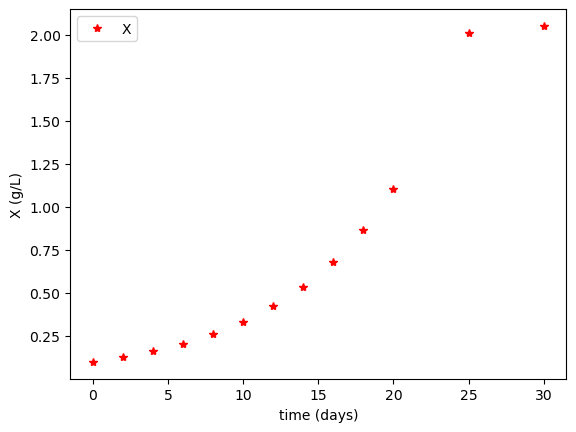

In [11]:
import numpy as np
import matplotlib.pyplot as plt

time=np.array([0,2,4,6,8,10,12,14,16,18,20,25,30])
x_exper=np.array([0.1,0.127,0.162,0.205, 0.261, 0.332, 0.422, 0.537, 0.682,0.867,1.102, 2.009, 2.05])

plt.figure(1)
plt.plot(time, x_exper,'*', color='red', label='exp')
plt.legend(loc='best')
plt.ylabel('X (g/L)') 
plt.xlabel('time (days)') 
plt.show()

Let's have a look at the cmol balance for biomass:

\begin{align*}
\frac{dC_i}{dt} &= D(C^F_i - C_i) + r_i C_X \\
\end{align*}

Given that this is a batch system, $D=0$ and thus:

\begin{align*}
\frac{dC_i}{dt} &= r_i C_X \\
\end{align*}

Accordingly the equation becomes:

\begin{align*}
\frac{dC_X}{dt} &= r_X C_X \\
\end{align*}

The rate of biomass formation ($r_X$) is described by the Greek symbol $\mu$, accordingly:

\begin{align*}
\frac{dC_X}{dt} &= \mu C_X \\
\end{align*}

For this example we know the maximum growth rate ($\mu_{max}$) to be 0.12 $\frac{1}{day}$.

Given this we can integrate the above equation to see if the the theory links up with the experimental results:

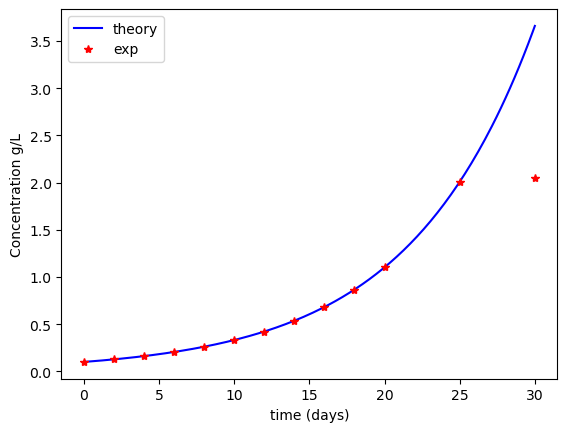

In [40]:
from scipy.integrate import odeint
mu=0.12

def response_fun(C,t):                       #function representing differential equation above
    Cx=C
    r=mu*Cx
    return r
    
MM_X=12+1.8+0.5*16+0.2*14

Co=[0.1/MM_X]                              #initial cmol value
tmax=30                                     # time to integrate to  
tspan=numpy.linspace(0,tmax,200)            # define the timespan of the integration and increments where values will be reported
Ci = odeint(response_fun, Co, tspan)             # integration via odeint that calls apon response_fun

Cx= Ci

plt.figure(2)
plt.plot(tspan, Cx*MM_X, color='blue', label='theory')
plt.plot(time, x_exper,'*', color='red', label='exp')
plt.legend(loc='best')
plt.ylabel('Concentration g/L') 
plt.xlabel('time (days)') 
plt.show()    

Wow, we see a perfect fit, but not the last experimental reading? Something makes the growth stops. We are most likely running out of substrate (glucose). To include the glucose in the equation we need to consider the total stoicheometry.

See if you can figure out all the components and equations:

In [43]:
import pandas
theta=0.3   #mol ATP/cmolX.day What is this?

S1 = np.matrix(pandas.read_excel('matrix1.xlsx'))
C= numpy.matrix([0, 0, 0,0,mu,0,theta]).T
    
S1

matrix([[ 1.        ,  0.        ,  1.        ,  1.        ,  1.        ,
          1.        ,  0.        ],
        [ 2.        ,  3.        ,  1.8       ,  2.        ,  2.        ,
          0.        ,  2.        ],
        [ 1.        ,  0.        ,  0.5       ,  1.        ,  0.66666667,
          2.        ,  1.        ],
        [ 0.        ,  1.        ,  0.2       ,  0.        ,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , -0.5       ,  0.        ,
          1.        ,  0.        ],
        [-0.66666667,  0.        , -1.8       ,  0.        ,  0.        ,
          0.        ,  0.        ]])

<img src="mat1.png" width="750" />

We can now solve the stoicheometry of this overall reaction:


$$ CH_2O+ NH_3 → X+CH_2O+CH_2O_{2/3}+CO_2+H_2O $$

Note that from specification 2:

$$r_C=0.5r_A$$

In [44]:
r = numpy.linalg.solve(S1, C) 
r
stoic=r/r[0,0]
stoic

matrix([[ 1.        ],
        [ 0.03100775],
        [-0.15503876],
        [-0.19810508],
        [-0.54780362],
        [-0.09905254],
        [-0.16106804]])

This implies that the stoicheometry is given by:

$$ CH_2O+ 0.031NH_3 → 0.155X+0.198CH_2O+0.548CH_2O_{2/3}+0.099CO_2+0.161H_2O $$

We can now use the stoicheometry to integrate all the components acccording to the equation:

\begin{align*}
\frac{dC_i}{dt} &= r_i C_X \\
\end{align*}




In [165]:
mumax=0.12
Ks=0.0003

def response_fun2(C,t):
    
    Cs, Cx, Ca, Cp = C[0],C[1],C[2],C[3]   #Considered components
    
    mu=mumax*Cs/(Ks+Cs)
    
    S1 = np.matrix(pandas.read_excel('matrix1.xlsx')) #import matrix into function
    C= numpy.matrix([0, 0, 0,0,mu,0,theta]).T
    r = numpy.linalg.solve(S1, C) 
    
    if Cs < 0.0001:   #No substate no reaction
        r[3,0]=0
        r[4,0]=0
        r[2,0]=0
    else:
         r=r
     
    return [r[0,0]*Cx,   # glucose
            r[2,0]*Cx,   # biomass
            r[3,0]*Cx,   # acetic
            r[4,0]*Cx]   # propionic    

Note that we can now integrate for glucose, biomass, acetic acid and propionic acid. We have have excluded the other components just because we can. We will start with 0.537 cmol/L of glucose. Let's integrate:


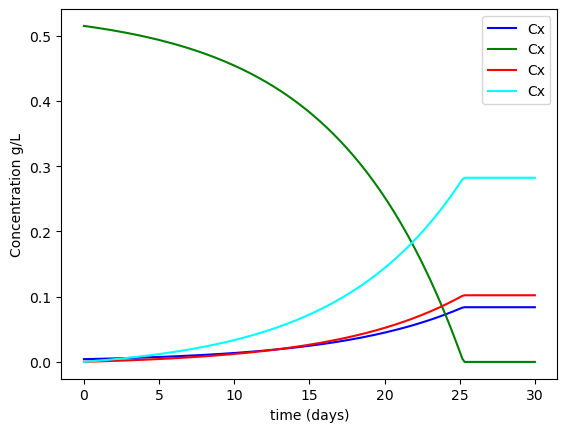

In [173]:
Co2=[0.515,0.1/MM_X,0,0]                      #initial cmol value
tmax=30                                     # time to integrate to  
tspan=numpy.linspace(0,tmax,200)            # define the timespan of the integration and increments where values will be reported
Ci2 = odeint(response_fun2, Co2, tspan)        # integration via odeint that calls apon response_fun

Cs, Cx, Ca, Cp = Ci2.T

plt.figure(3)
plt.plot(tspan, Cx, color='blue', label='Cx')
plt.plot(tspan, Cs, color='green', label='Cx')
plt.plot(tspan, Ca, color='red', label='Cx')
plt.plot(tspan, Cp, color='cyan', label='Cx')
plt.legend(loc='best')
plt.ylabel('Concentration g/L') 
plt.xlabel('time (days)') 
plt.show() 
   

Let's plot the experimental data and theoretical model for biomass:

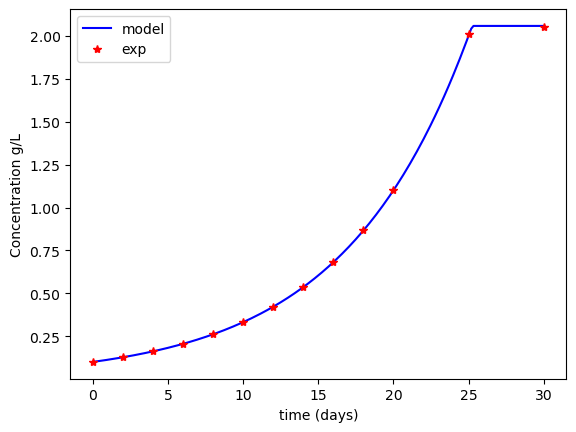

In [174]:
plt.figure(4)
plt.plot(tspan, Cx*MM_X, color='blue', label='model')
plt.plot(time, x_exper,'*', color='red', label='exp')
plt.legend(loc='best')
plt.ylabel('Concentration g/L') 
plt.xlabel('time (days)') 
plt.show() 

a) Start by plotting $C_X$ against time, what do you see?

The equation linking $\mu$ to $C_X$ is the following:

$$\frac{dC_X}{dt}=\mu C_X $$  